#**Lab 12 - Metodo degli Elementi Finiti per problemi parabolici**

Consideriamo il seguente problema tempo-dipendente nel caso monodimensionale, sul dominio $\Omega_T=\Omega\times[0,T)$, con $\Omega=(a,b)$:

Dati $\alpha:[0,T)\longrightarrow\mathbb{R}$, $\beta:[0,T)\longrightarrow\mathbb{R}$ e $u_0:\Omega\longrightarrow\mathbb{R}$, trovare $u:\Omega_T\longrightarrow\mathbb{R}$ tale che:
</br></br>
$$\begin{cases}
			\partial_t u - \partial_x(\gamma\partial_x u) = f, & \text{in}\ \Omega_T, \\
			u(a,t) = \alpha(t), & \text{per}\ t\in[0,T), \\
			u(b,t) = \beta(t), & \text{per}\ t\in[0,T), \\
			u(x,t=0) = u_0, & \text{in}\ \Omega\times\{0\}.
\end{cases}$$
</br>
Date condizioni al bordo di Dirichlet omogenee, la forma debole di questo problema è:
</br>

Trovare, $\forall t \in [0,T), \ u(t)\in V= H_0^1(\Omega)$ tale che
</br></br>
$$m(\partial_t u,v) + a(u,v) = F(v), \qquad \forall v\in V,$$
</br>
dove abbiamo definito:
$$m(u,v) = \int_a^b u v dx, \quad a(u,v) =\int_a^b \gamma \partial_x u \partial_x v dx, \quad F(v)=\int_a^b f v dx.$$

Fissato $t\in(0,T)$, la semi-discretizzazione in spazio si ottiene applicando il **Metodo degli Elementi Finiti**, scegliendo un sottospazio $V_h\subset V$ di dimensione $N_h$ finita e una sua base di funzioni linearmente indipendenti $\{\phi_j\}_{j=1}^{N_h}$. Il problema semi-discreto può quindi essere scritto in forma matriciale come segue:

Trovare, $\forall t\in [0,T), \ \mathbf{u}(t)\in\mathbb{R}^{N_h}$ tale che
</br></br>
$$
\mathbf{M}d_t\mathbf{u}(t)+\mathbf{A}\mathbf{u}(t) = \mathbf{f}(t),$$
</br>
dove
* $\mathbf{M}\in\mathbb{R}^{N_h\times N_h}:\ m_{ij}=m(\phi_j,\phi_i)$ è la matrice di massa degli Elementi Finiti;
* $\mathbf{A}\in\mathbb{R}^{N_h\times N_h}:\ a_{ij}=a(\phi_j,\phi_i)$ è la matrice di rigidezza;
* $\mathbf{f}(t)\in\mathbb{R}^{N_h}:\ \mathbf{F}(\phi_i)=[\mathbf{M}[f_{1}(t),\dots,f_{N_{h}}(t)]^{T}]_{i}$ è il vettore termine noto;
* $\mathbf{u}(t)\in\mathbb{R}^{N_h}:\ \mathbf{u}(t)=[u_1(t),\dots,u_{N_h}(t)]^T$.

Per il calcolo di $\mathbf{A}$ e $\mathbf{M}$ utilizziamo lo spazio degli Elementi Finiti
</br></br>
$$X_{h,0}^r = \{v_h\in\mathcal{C}([0,T]):\ v_h\big|_{[x_{i-1},x_i]}\in\mathbb{P}_r(x_{i-1},x_i)\}\cap\mathcal{C}([0,L]).$$
</br>

Il problema in tempo è quindi una ODE e può essere riscritto come segue:
</br></br>
$$
\begin{cases}
	d_t\mathbf{u}(t) =\tilde{\mathbf{f}}(t,\mathbf{u}(t))), & t\in[0,T), \\
	\mathbf{u}(0) =\mathbf{u}_0,
\end{cases}
$$
</br>

con termine noto $\tilde{\mathbf{f}}(t,\mathbf{u}(t))=-\mathbf{M}^{-1}\mathbf{A}\mathbf{u}(t)+\mathbf{M}^{-1}\mathbf{f}(t)$.

Dividiamo quindi $[0,T]$ in $N_t$ sottointervalli $(t_n, t_{n+1})$ tali che $t_0=0$, $t_{N_h}=T$, $t_n=n\Delta t$, con passo temporale $\Delta t=T/N_t$ e definiamo $\mathbf{u}^n=\mathbf{u}(t_n), \ n=0,\dots,N_t$.

Discretizziamo la derivata in tempo come:
$$		d_t \mathbf{u} \simeq \frac{\mathbf{u}^{n+1}-\mathbf{u}^n}{\Delta t}$$
e applichiamo il *$\theta$-metodo* per discretizzare la ODE:
</br></br>
$$		\frac{\mathbf{u}^{n+1}-\mathbf{u}^n}{\Delta t} = \theta\tilde{\mathbf{f}}^{n+1} + (1-\theta)\tilde{\mathbf{f}}^n, \qquad \theta\in[0,1].
$$
</br>

Sostituendo qui l'espressione di $\tilde{\mathbf{f}}$ otteniamo:
$$		\mathbf{M}\frac{\mathbf{u}^{n+1}-\mathbf{u}^n}{\Delta t}+\theta \mathbf{A}\mathbf{u}^{n+1} +(1-\theta)\mathbf{A}\mathbf{u}^n = \theta\mathbf{f}^{n+1}+(1-\theta)\mathbf{f}^n, \qquad \theta\in[0,1]. $$

Infine, il problema discreto diventa:

$\forall n=1,\dots,N_t$ trovare $\mathbf{u}^n\in\mathbb{R}^{N_h}$ tale che
</br></br>
$$
\begin{cases}
		\left(\frac{\mathbf{M}}{\Delta t} +\theta \mathbf{A}\right)\mathbf{u}^{n+1} = \left(\frac{\mathbf{M}}{\Delta t} - (1-\theta) \mathbf{A}\right)\mathbf{u}^{n} + \theta\mathbf{f}^{n+1}+(1-\theta)\mathbf{f}^n, & \forall n=1,\dots,N_t, \\
			\mathbf{u}^0 = \mathbf{u}_0.
\end{cases}
$$
</br>
A partire dall'istante $n=0$, possiamo ricavare iterativamente tutti i valori di $\mathbf{u}$ al passo successivo attraverso la risoluzione di un sistema lineare:

*Theta-metodo. Input: $\{\mathbf{f}^n\}_{n=1}^{N_t}$, $\mathbf{u}_0, \ \theta$. Output: $\mathbf{U}$*

1. Inizializzo $\mathbf{u}_{n}=\mathbf{u}_0$, $\mathbf{U}=[\mathbf{u}_n]$;
2.  For $n=1,\dots,N_t$

  2.1.  Calcolo $\mathbf{u}_{n+1}$ come soluzione del sistema lineare dato dal $theta$-metodo con parametro $\theta$;

	2.2. Aggiorno $\mathbf{u}_{n}=\mathbf{u}_{n+1}$;

	2.3. $\mathbf{U}=[\mathbf{U},\mathbf{u}_{n+1}]$.


Il $\theta$-metodo è incondizionatamente assolutamente stabile per $\theta\in[0.5,1]$ e condizionatamente assolutamente stabile per $\theta\in[0,0.5)$, con condizione di stabilità
</br></br>
$$		\Delta t\leq \frac{2}{\max|\lambda(\mathbf{M}^{-1}\mathbf{A})|}\approx ch^2,
$$
</br>
dove $\lambda(\mathbf{M}^{-1}\mathbf{A})$ indica gli autovalori della matrice $\mathbf{M}^{-1}\mathbf{A}$, da cui dipende la costante $c>0$.

#**Esercizio 1: problema del calore**

Dato il problema
</br></br>
$$
\begin{cases}
  \partial_t u - \partial_{x} D \partial_x u = f(x), & \text{in}\ (0,L)\times [0,T), \\
  u(0,t)=u(L,t)=0, & \text{per}\ t\in [0,T), \\
  u(x,0)=u_0, & \text{in}\ (0,L),
\end{cases}
$$
</br>
con $D=1$, $L=1$, $T=1$,
</br></br>
$$ u_0(x)= \sin(\pi x), \qquad f(x,t)= (\pi^2-2)\sin(\pi x)e^{-2t}.$$
</br>
Si consideri la function seguente funzione

      heatSolve(D, f, L, h, u0, T, dt, theta)
      ##
      ##
      return V,u,t

dove in input abbiamo:

  * $D$ il coefficiente di diffusione;
  * $f$ termine noto;
  * $L$ lunghezza dell'intervallo spaziale;
  * $h$ passo della griglia spaziale;
  * $u_0$ dato iniziale;
  * $T$ istante di tempo finale;
  * $dt$ passo temporale;
  * theta, parametro del theta-metodo;

ed in output

  * $V$ spazio FEM;
  * $u$ matrice contentente i corrispondenti valori della soluzione $u_{i,n}=u_i(t^n)$, $i=1,\dots,N_h$, $n=1,\dots,N_T$;
  * $t$ vettore contenente gli istanti temporali: $t^n$, $n=0,\dots,N_t$.



<mark>**Esercizio 1.1**<mark><br>

Si implementi il $\theta$-metodo per la risoluzione del problema in tempo nella function heatSolve.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from fem import install

install()

In [2]:
from fem import Line, generate_mesh, FEspace, assemble, interpolate, deriv, dx, ds, DirichletBC, applyBCs, dof2fun, fun2dof, dofs, plot

def heatSolve(D,f,u0,L,h,T,dt,theta):
  """"
  Input:
     D      (float)                  Coefficiente di diffusione (positivo).
     f      (lambda function)        Forzante. Si assume f = f(x,t).
     u0     (lambda function)        Condizione iniziale.
     L      (float)                  Lunghezza dell'intervallo spaziale.
     h      (float)                  Passo della griglia spaziale.
     T      (float)                  Tempo finale
     dt     (float)                  Passo temporale.
     theta  (float)                  Parametro del theta-metodo.

  Output:
    V                               spazio elementi finiti
    u     (numpy.ndarray)-> matrix  Matrice contenente la soluzione
                                    approssimata del problema. Uij
                                    approssima u(dof_i, tj): ogni colonna è un
                                    tempo fissato.
    t      (numpy.ndarray)-> vector Griglia temporale.
  """""
  # costruisco il dominio
  domain = Line(0, L)
  # costruisco la mesh
  mesh = generate_mesh(domain, stepsize = h)
  # costruisco lo spazio FEM di grado 1
  V = FEspace(mesh, 1)

  # costruisco la griglia temporale
  nt = np.ceil(T/dt)+1
  t = np.zeros(int(nt))

  # initializzo la soluzione
  u = np.zeros((dofs(V).size, int(nt)))

  # definisco la condizione iniziale
  u0h = fun2dof(interpolate(u0,V))
  u[:, 0] = u0h

  # matrice di massa
  def m(u, v):
    return u*v*dx
  # assemblaggio matrice di massa
  M = assemble(m, V)

  # matrice di diffusione
  def a(u,v):
    return deriv(u)*deriv(v)*dx
  # assemblaggio matrice di diffusione
  A = D*assemble(a,V)

  # ciclo temporale
  for n in range(int(nt)-1):
    # costruzioni termini noti al tempo dt e dt+1
    t_old = n*dt
    t_new = (n+1)*dt

    fold = lambda x: f(x,t_old)
    fnew = lambda x: f(x,t_new)

    fold_h = interpolate(fold, V)
    def lold(v):
      return fold_h*v*dx
    Fold = assemble(lold, V)

    fnew_h = interpolate(fnew, V)
    def lnew(v):
      return fnew_h*v*dx
    Fnew = assemble(lnew, V)

    # condizioni al bordo omogenee di tipo dirichlet
    def isLeftNode(x):
      return x < 1e-12

    def isRightNode(x):
      return x > L - 1e-12

    dbc1 = DirichletBC(isLeftNode,  0.0)
    dbc2 = DirichletBC(isRightNode, 0.0)

    A = applyBCs(A, V, dbc1, dbc2)
    M = applyBCs(M, V, dbc1, dbc2)
    Fold = applyBCs(Fold, V, dbc1, dbc2)
    Fnew = applyBCs(Fnew, V, dbc1, dbc2)

    # Costruzione del sistema lineare e sua risoluzione
    B = (M/dt+theta*A)
    b = (M/dt-(1-theta)*A)@u[:,n] + theta*Fnew +(1-theta)*Fold

    from scipy.sparse.linalg import spsolve

    u[:,n+1] = spsolve(B, b)
    t[n+1] = t_new

  return V,u,t


<mark>**Esercizio 1.2**<mark><br>

Risolvere il problema con i seguenti dati: $h=0.1$, $\Delta t = 0.01$ e $\theta = 0.5$.

In [3]:
# Dati del problema del calore
T=1
dt = 0.01
# intervallo
L=1
h=0.1
# coefficiente di diffusione
D=1
# parametro per il theta methodo
theta = 0.5
# termine noto
f = lambda x, t: (np.pi*np.pi -2)*np.sin(np.pi*x)*np.exp(-2*t)
# condizione iniziale
u0 = lambda x: np.sin(np.pi*x)

# risoluzione equazione del calore
V,u,t = heatSolve(D,f,u0,L,h,T,dt,theta)

<mark>**Esercizio 1.3**<mark><br>

Data la soluzione esatta
</br></br>
$$
u_{\text{ex}}(x,t)=\sin(\pi x)e^{-2t}
$$
</br>
rappresentare su due grafici la soluzione esatta e la soluzione approssimata in $[0,T)$.

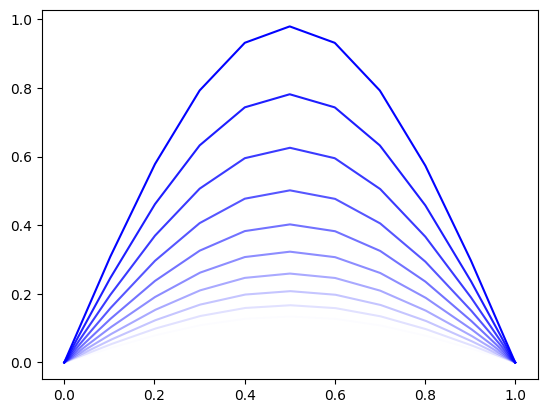

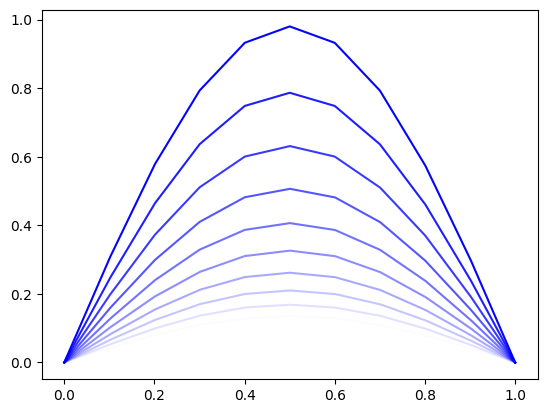

In [4]:
from fem import xtplot

uex = lambda x,t: np.sin(np.pi*x)*np.exp(-2*t);

# questo serve per la rappresentazione della soluzione esatta
uex_t = np.zeros(u.shape)

for i in range(len(t)):
  uext = lambda x: uex(x,t[i])
  uext =interpolate(uext,V)
  uex_t[:,i] = fun2dof(uext)

# soluzione approssimata
xtplot(V,u,t,'fade')
plt.show()

# soluzione esatta
xtplot(V,uex_t,t,'fade')
plt.show()


<mark>**Esercizio 1.4**<mark><br>

Calcolare l'errore
</br></br>
$$
e(h,\Delta t):=\max_{t^{n}}\sqrt{\int_{0}^{L}|u_{ex}(x,t^{n})-u_{h}(x,t^{n})|^{2}dx}
$$
</br>
cioè il massimo, in tempo, degli errori in norma $L^2$, dove $u_{h}(x,t^{n}):=\sum_{i=1}^{N_{h}}u_{i,n}\phi_{i}(x)$.

In [5]:
from fem import L2error

domain = Line(0, L)

err_t = []
for i in range(len(t)):
  uext = lambda x: uex(x,t[i])
  uht = dof2fun(u[:,i], V)
  err_t.append(L2error(uext, uht, domain))

err = max(err_t)

print(err)

0.008293779025060139


<mark>**Esercizio 1.5**<mark><br>

Risolvere il problema con $h=0.01$ e $\theta=1$ per $\Delta t$ che assume i valori $\{0.2,\ 0.1,\ 0.05,\ 0.025\}$ e rappresentare su un grafico l'andamento dell'errore $e(h,\Delta t)$ al variare di $\Delta t$. Cosa si osserva?

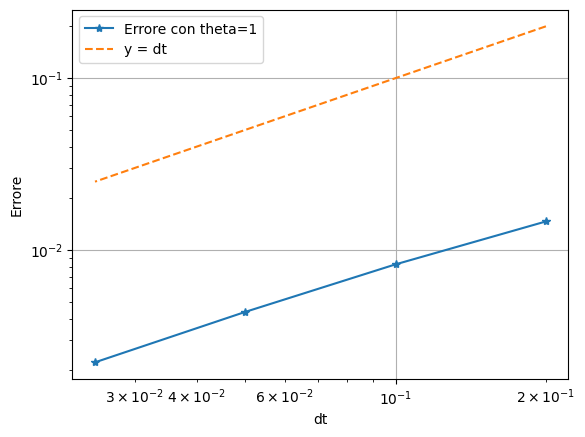

In [6]:
h = 0.01
theta = 1

errors = []

dts = [0.2, 0.1, 0.05, 0.025]
for dt in dts:
  V,u,t = heatSolve(D,f,u0,L,h,T,dt,theta)

  err_t = []

  for i in range(len(t)):
    uext = lambda x: uex(x,t[i])
    uht = dof2fun(u[:,i], V)
    err_t.append(L2error(uext, uht, domain))

  err = max(err_t)

  errors.append(err)

plt.figure()
plt.loglog(dts, errors, '*-')
plt.loglog(dts,dts, '--')
plt.grid()
plt.xlabel('dt')
plt.ylabel('Errore')
plt.legend(['Errore con theta=1','y = dt'])
plt.show()

Il grafico rappresenta l'andamento del massimo errore in norma $L^2$ sul ogni griglia temporale onsiderata, confrontato con la linea $y=dt$. Osserviamo che l'errore decresce per passi temporali ridotti e l'ordine di convergenza è pari a 1.

<mark>**Esercizio 1.6**<mark><br>

Risolvere il problema con $h=0.01$ e $\theta=0$ per $\Delta t$ che assume i valori $\{0.2,\ 0.1,\ 0.05,\ 0.025\}$ e rappresentare su un grafico l'andamento dell'errore $e(h,\Delta t)$ al variare di $\Delta t$. Cosa si osserva?

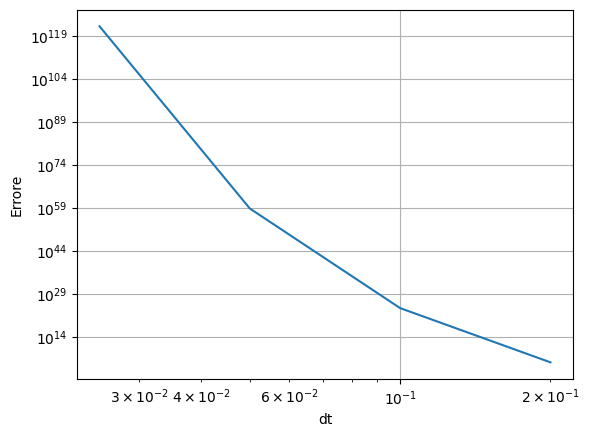

In [7]:
theta = 0

errors = []

dts = [0.2, 0.1, 0.05, 0.025]
for dt in dts:
  V,u,t = heatSolve(D,f,u0,L,h,T,dt,theta)

  err_t = []

  for i in range(len(t)):
    uext = lambda x: uex(x,t[i])
    uht = dof2fun(u[:,i], V)
    err_t.append(L2error(uext, uht, domain))

  err = max(err_t)

  errors.append(err)

plt.figure()
plt.loglog(dts, errors)
plt.grid()
plt.xlabel('dt')
plt.ylabel('Errore')
plt.show()

L'errore esplode al decrescere del passo temporale scelto. Infatti il metodo è condizionatamente stabile per $\theta\in[0,0.5)$ e la condizione $\Delta t \leq c h^2$ sul rapporto tra i passi delle due griglie non è rispettata.

#**Esercizio 2: problema diffusione-trasporto tempo dipendente**

Si consideri il problema di diffusione-trasporto tempo dipendente
</br></br>
$$
\begin{cases}
    \partial_t u = a \partial_{xx} u - b \partial_x u + f(x), & \text{in}\ (0,L)\times [0,T), \\
    u(0,t)=0,\ u(L,t)=0, & \text{per}\ t\in [0,T), \\
    u(x,0)=u_0, & \text{in}\ (0,L)
\end{cases}
$$
</br>
con coefficienti costanti, $a=10^{-2}$, $b=1$, $L=1$, $T=0.25$, forzante nulla, $f(x,t) \equiv 0$, e profilo iniziale
</br></br>
$$
u_0(x)= \begin{cases}
\cos^{4}(4\pi x - 2\pi) & 0.375\le x \le 0.625\\
0 & \text{altrimenti}.
\end{cases}
$$
</br>
Si consideri la function
  
    parabolicSolve(a, b, f, L, h, u0, T, dt, theta)
    ##
    ##
    return V,u,t

dove in input abbiamo:

  * $a$, $b$ coefficiente di diffusione e trasporto, rispettivamente;
  * $f$ termine noto;
  * $L$ lunghezza dell'intervallo spaziale;
  * $h$ passo della griglia spaziale;
  * $u_0$ dato iniziale;
  * $T$ istante di tempo finale;
  * $dt$ passo temporale;
  * theta, parametro del theta-metodo;

ed in output

  * $V$ spazio FEM;
  * $u$ matrice contentente i corrispondenti valori della soluzione $u_{i,n}=u_i(t^n)$, $i=1,\dots,N_h$, $n=1,\dots,N_T$;
  * $t$ vettore contenente gli istanti temporali: $t^n$, $n=0,\dots,N_t$.


In [8]:
from fem import Line, generate_mesh, FEspace, assemble, interpolate, deriv, dx, ds, DirichletBC, applyBCs, dof2fun, fun2dof, dofs, plot

def parabolicSolve(a,b,f,u0,L,h,T,dt,theta):
  """"
  Input:
     a      (float)                  Coefficiente di diffusione (positivo).
     b      (float)                  Velocità di trasporto.
     f      (lambda function)        Forzante. Si assume f = f(x,t).
     u0     (lambda function)        Condizione iniziale.
     L      (float)                  Lunghezza dell'intervallo spaziale.
     h      (float)                  Passo della griglia spaziale.
     T      (float)                  Tempo finale
     dt     (float)                  Passo temporale.
     theta  (float)                  Parametro del theta-metodo.

  Output:
    V                               spazio elementi finiti
    u     (numpy.ndarray)-> matrix  Matrice contenente la soluzione
                                    approssimata del problema. Uij
                                    approssima u(dof_i, tj): ogni colonna è un
                                    tempo fissato.
    t      (numpy.ndarray)-> vector Griglia temporale.
  """""
  # costruisco il dominio
  domain = Line(0, L)
  # costruisco la mesh
  mesh = generate_mesh(domain, stepsize = h)
  # costruisco lo spazio FEM di grado 1
  V = FEspace(mesh, 1)

  # costruisco la griglia temporale
  nt = np.ceil(T/dt)+1
  t = np.zeros(int(nt))

  # initializzo la soluzione
  u = np.zeros((dofs(V).size, int(nt)))

  # definisco la condizione iniziale
  u0h = fun2dof(interpolate(u0,V))
  u[:, 0] = u0h

  # matrice di massa
  def m(u, v):
    return u*v*dx
  # assemblaggio matrice di massa
  M = assemble(m, V)

  # matrice di diffusione
  def a_diff(u,v):
    return deriv(u)*deriv(v)*dx
  # assemblaggio matrice di diffusione
  A_diff = assemble(a_diff,V)

  # matrice di trasporto
  def a_trasp(u,v):
    return deriv(u)*v*dx
  # assemblaggio matrice di trasporto
  A_trasp = assemble(a_trasp, V)

  A = a*A_diff + b*A_trasp

  # ciclo temporale
  for n in range(int(nt)-1):
    # costruzioni termini noti al tempo dt e dt+1
    t_old = n*dt
    t_new = (n+1)*dt

    fold = lambda x: f(x,t_old)
    fnew = lambda x: f(x,t_new)

    fold_h = interpolate(fold, V)
    def lold(v):
      return fold_h*v*dx
    Fold = assemble(lold, V)

    fnew_h = interpolate(fnew, V)
    def lnew(v):
      return fnew_h*v*dx
    Fnew = assemble(lnew, V)

    # condizioni al bordo omogenee di tipo dirichlet
    def isLeftNode(x):
      return x < 1e-12

    def isRightNode(x):
      return x > L - 1e-12

    dbc1 = DirichletBC(isLeftNode,  0.0)
    dbc2 = DirichletBC(isRightNode, 0.0)

    A = applyBCs(A, V, dbc1, dbc2)
    M = applyBCs(M, V, dbc1, dbc2)
    Fold = applyBCs(Fold, V, dbc1, dbc2)
    Fnew = applyBCs(Fnew, V, dbc1, dbc2)

    # Costruzione del sistema lineare e sua risoluzione
    B = (M/dt+theta*A)
    b = (M/dt-(1-theta)*A)@u[:,n] + theta*Fnew +(1-theta)*Fold

    from scipy.sparse.linalg import spsolve

    u[:,n+1] = spsolve(B, b)
    t[n+1] = t_new

  return V,u,t

<mark>**Esercizio 2.1**<mark><br>

Si testi la funzione *parabolicSolve* con $h =0.005$, $\Delta t = 0.001$.

In [9]:
# Dati del problema
a = 0.01
b = 1
L = 1
h = 0.005
T = 0.25
dt = 0.001

# termine noto
f = lambda x,t : 0*x*t
# dato iniziale
u0 = lambda x : np.cos(4*np.pi*x - 2*np.pi)**4 * (x <= 0.625) * (x >= 0.375)

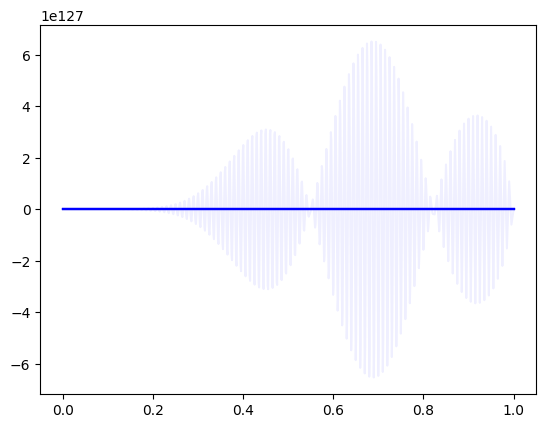

In [10]:
# coefficiente di diffusione 0.01, coeffciente di trasporto 1
# theta = 0.0
V,u,t = parabolicSolve(a,b,f,u0,L,h,T,dt,0)
xtplot(V,u,t,'fade')
plt.show()

*Commento:* La soluzione discreta esplod perchè Eulero esplicito è condizionatamente assolutamente stabile e con questa scelta di h e dt ci troviamo fuori dalla regione di assoluta stabilità. Notare l'ordine di grandezza dell'asse y.

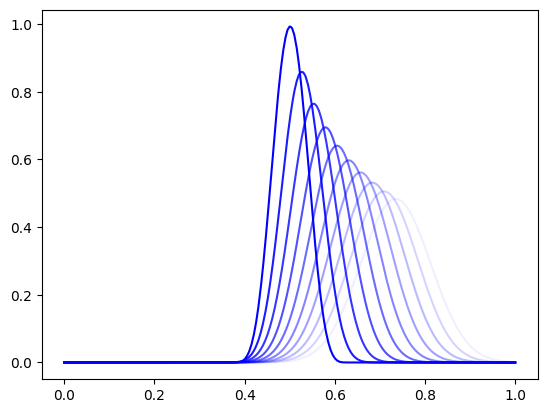

In [11]:
# coefficiente di diffusione 0.01, coeffciente di trasporto 1
# theta = 0.5
V,u,t = parabolicSolve(a,b,f,u0,L,h,T,dt,0.5)
xtplot(V,u,t,'fade')
plt.show()

*Commento:* La soluzione discreta si comporta come ci si aspetta, infatti si può notare che la soluzione discreta viene trasportata nella direzione positiva dell'asse 𝑥 (coefficiente b>0) ed è soggetta a diffusione. Ricordiamo che Crank-Nicholson è incondizionatamente assolutamente stabile.

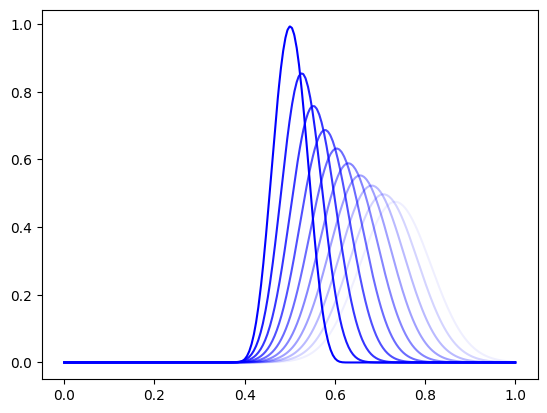

In [12]:
# coefficiente di diffusione 0.01, coeffciente di trasporto 1
# theta = 1
V,u,t = parabolicSolve(a,b,f,u0,L,h,T,dt,1)
xtplot(V,u,t,'fade')
plt.show()

*Commento:* Stesso discorso che abbiamo fatto per Crank-Nicholson lo possiamo vedere con Eulero implicito.

Per far rientrare il metodo di Eulero esplicito nella regione di di assoluta stabilità, modifichiamo i dati come segue.

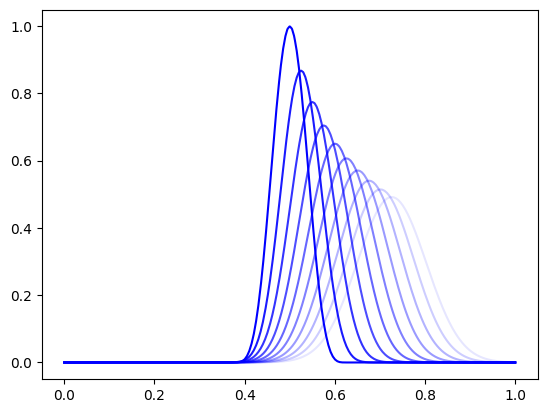

In [13]:
# coefficiente di diffusione 0.01, coeffciente di trasporto 1
# theta = 0 e dt = 1.e-4
V,u,t = parabolicSolve(a,b,f,u0,L,h,T,1e-4,0)
xtplot(V,u,t,'fade')
plt.show()


*Commento:* osserviamo che diminuendo il passo $\Delta t$ possiamo vedere che Eulero esplicito diventa assolutamente stabile.

<mark>**Esercizio 2.2**<mark><rb>

Si ripeta il punto precedente variando i valori di $a>0$ e $b\in\mathbb{R}$. Come cambia la soluzione numerica?

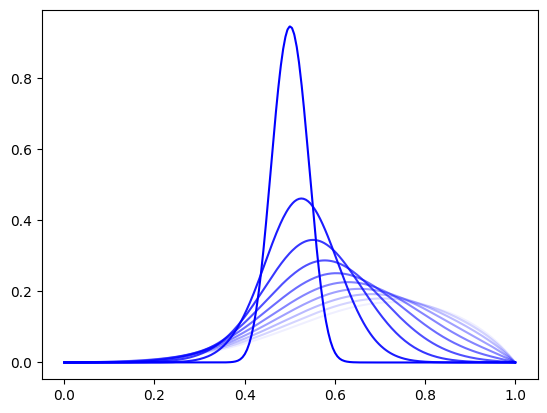

In [14]:
# Esempio 1 aumentiamo il coefficiente di dffusione per eulero implicito
# coefficiente di diffusione 0.1, coeffciente di trasporto 1
# theta = 1
V,u,t = parabolicSolve(1e-1,b,f,u0,L,h,T,dt,1)
xtplot(V,u,t,'fade')
plt.show()

Aumentando il coefficiente $a$ la soluzione è soggetta maggiormente all'effetto di diffusione e possiamo osservare la più rapida diminuzione dell'ampiezza della condizione iniziale.

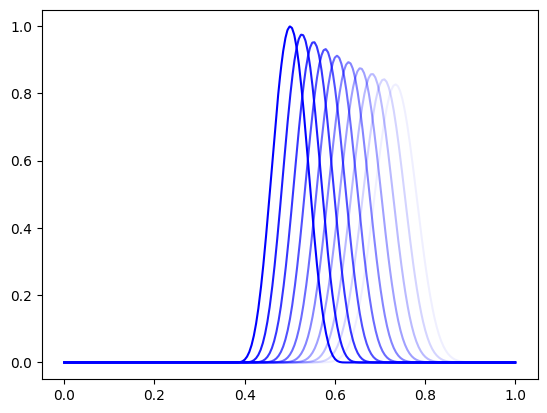

In [15]:
# Esempio 2 diminuiamo il coefficiente di dffusione per eulero implicito
# coefficiente di diffusione 0.001, coeffciente di trasporto 1
# theta = 1
V,u,t = parabolicSolve(1e-3,b,f,u0,L,h,T,dt,1)
xtplot(V,u,t,'fade')
plt.show()

Rimpicciolendo il coefficiente $a$ la soluzione è meno soggetta a diffusione e osserviamo la condizione iniziale trasportata lungo la direzione positiva dell'asse $x$ con lieve diminuzione della sua ampiezza.

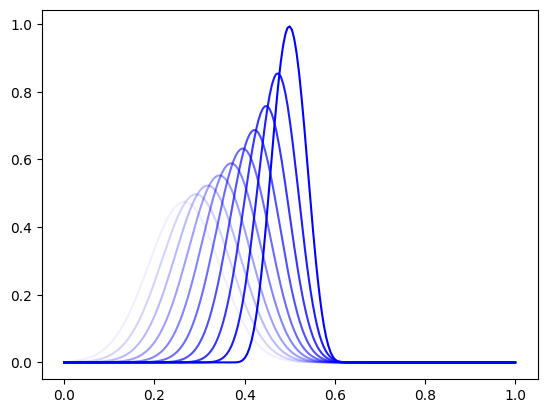

In [16]:
# Esempio 3 inverto il trasporto per eulero implicito
# coefficiente di diffusione 0.01, coeffciente di trasporto -1
# theta = 1
V,u,t = parabolicSolve(1e-2,-b,f,u0,L,h,T,dt,1)
xtplot(V,u,t,'fade')
plt.show()

Invertendo il segno del coefficiente $b$ abbiamo invertito il verso della velocità di trasporto. Adesso la condizione iniziale viene traportata lungo la direzione negativa dell'asse $x$.


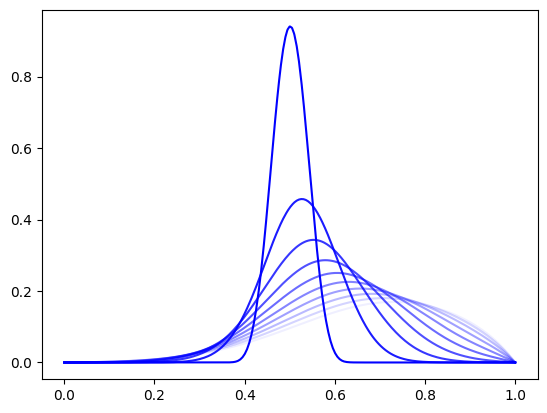

In [17]:
# Esempio 4 aumentiamo il coefficiente di dffusione per Crank–Nicolson
# coefficiente di diffusione 0.1, coeffciente di trasporto 1
# theta = 0.5
V,u,t = parabolicSolve(1e-1,b,f,u0,L,h,T,dt,0.5)
xtplot(V,u,t,'fade')
plt.show()

Risultato simile a quanto visto per $\theta = 1$.

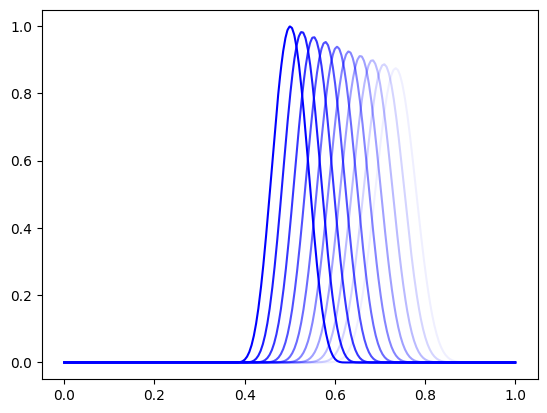

In [18]:
# Esempio 5 diminuiamo il coefficiente di dffusione per Crank–Nicolson
# coefficiente di diffusione 0.001, coeffciente di trasporto 1
# theta = 0.5
V,u,t = parabolicSolve(1e-3,b,f,u0,L,h,T,dt,0.5)
xtplot(V,u,t,'fade')
plt.show()

Risultato simile a quanto visto per $\theta = 1$.

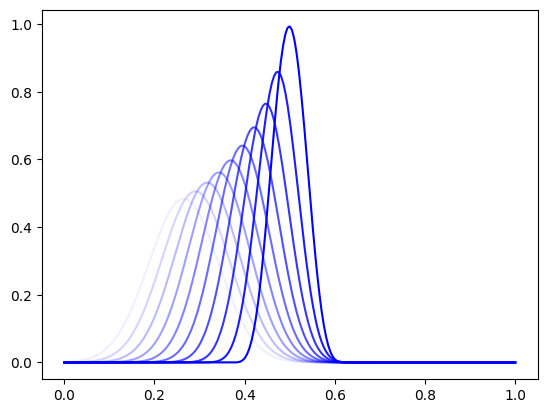

In [19]:
# Esempio 6 inverto il trasporto per Crank-Nicolson
# coefficiente di diffusione 0.01, coeffciente di trasporto -1
# theta = 0.5
V,u,t = parabolicSolve(a,-1,f,u0,L,h,T,dt,0.5)
xtplot(V,u,t,'fade')
plt.show()

Risultato simile a quanto visto per $\theta = 1$.

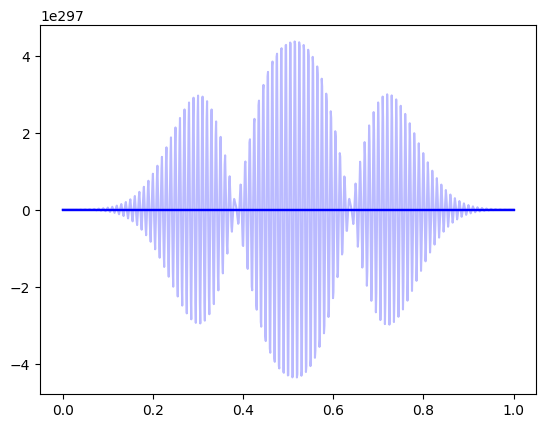

In [20]:
# Esempio 7 Eulero esplicito
# coefficiente di diffusione 0.01, coeffciente di trasporto 1
# theta = 0
V,u,t = parabolicSolve(1e-1,b,f,u0,L,h,T,dt,0)
xtplot(V,u,t,'fade')
plt.show()


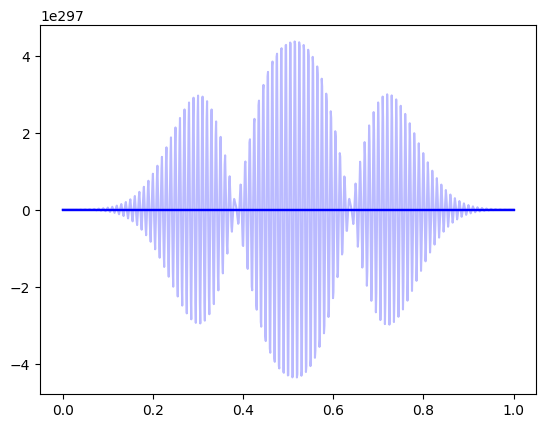

In [21]:
# coefficiente di diffusione 0.01, coeffciente di trasporto 1
V,u,t = parabolicSolve(1e-1,b,f,u0,L,h,T,dt,0)
xtplot(V,u,t,'fade')
plt.show()


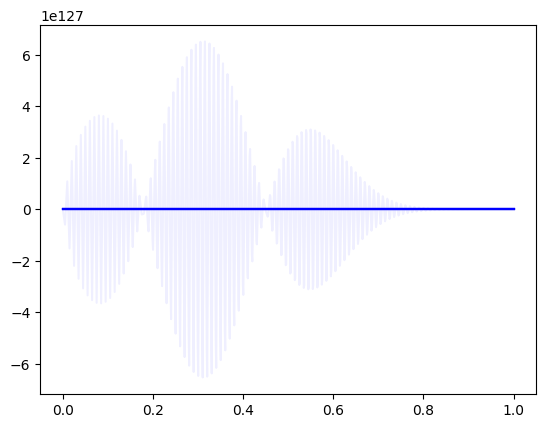

In [22]:
# coefficiente di diffusione 0.01, coeffciente di trasporto -1
V,u,t = parabolicSolve(a,-b,f,u0,L,h,T,dt,0)
xtplot(V,u,t,'fade')
plt.show()

Trovandoci al di fuori della regione di assoluta stabilità per il theta metodo con $\theta=0$, la soluzione esplode negli istanti finali e non possiamo osservare i cambiamenti attesi dovuti alla variazione dei parametri.

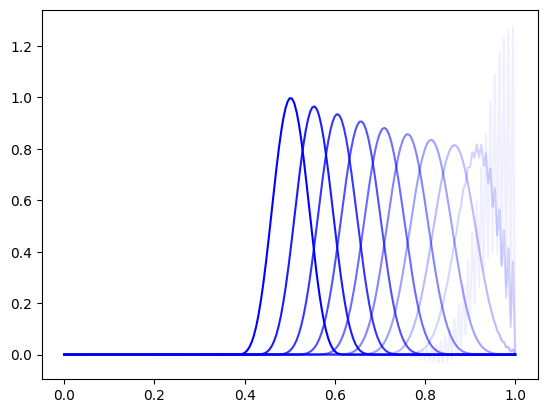

In [23]:
# coefficiente di diffusione 0.001, coeffciente di trasporto 2
# Uso eulero implicito
V,u,t = parabolicSolve(0.0001,2,f,u0,L,h,T,dt,1)
xtplot(V,u,t,'fade')
plt.show()

*Commento*: Qui sopra un esempio di instabilità non legata all'avanzamento temporale (Eulero implicito/CN/eulero esplicito) ma all'interazione tra il termine diffusivo e di trasporto
